In [1]:
using Pkg
Pkg.activate(".")
#Pkg.add(["Plots", "JSON", "BenchmarkTools", "SortingAlgorithms"])

  Activating project at `~/courses/CURSO-ALGO-IR/U4`


In [22]:
using BenchmarkTools, JSON, Plots, SortingAlgorithms, Base.Order, Base.Sort
include("MySorting.jl")

Main.MySorting

In [3]:
A = rand(Int,10_000)
A_sorted = sort(A)
sort(A, MySorting.HeapSort()) == A_sorted
sort(A; alg=MySorting.BubbleSort()) == A_sorted


true

In [14]:
@benchmark sort!(rand(Int, 10_000); alg=MySorting.HeapSort())

BenchmarkTools.Trial: 8161 samples with 1 evaluation.
 Range (min … max):  599.936 μs …  1.612 ms  ┊ GC (min … max): 0.00% … 60.54%
 Time  (median):     605.698 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   610.496 μs ± 39.175 μs  ┊ GC (mean ± σ):  0.25% ±  2.41%

   ▄▇██▆▅▄▃▂▁▁▂▂▃▃▃▂▂▁                                         ▂
  ███████████████████████▇▆▅▆▇▇▅▇▅▇▃▅▃▅▁▄▅▄▄▄▅▄▄▁▁▅▁▃▃▁▃▃▃▃▃▃▃ █
  600 μs        Histogram: log(frequency) by time       680 μs <

 Memory estimate: 78.17 KiB, allocs estimate: 2.

In [19]:
@benchmark sort!(rand(Int, 10_000); alg=MySorting.BubbleSort())

BenchmarkTools.Trial: 44 samples with 1 evaluation.
 Range (min … max):  114.404 ms … 120.895 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     115.725 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   115.897 ms ±   1.175 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▁   ▁▄  ▁█▁▁█▄ ▄▄  ▄                                           
  █▆▁▆██▆▆██████▁██▆▁█▁▆▁▆▁▆▁▁▁▁▁▁▁▁▁▆▁▁▁▁▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆ ▁
  114 ms           Histogram: frequency by time          121 ms <

 Memory estimate: 78.17 KiB, allocs estimate: 2.

In [16]:
@benchmark sort!(rand(Int, 10_000); alg=HeapSort)

BenchmarkTools.Trial: 8076 samples with 1 evaluation.
 Range (min … max):  596.886 μs …  2.745 ms  ┊ GC (min … max): 0.00% … 75.73%
 Time  (median):     607.467 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   614.699 μs ± 36.274 μs  ┊ GC (mean ± σ):  0.12% ±  1.55%

      ▂█▇▁                                                      
  ▂▃▄▅████▆▄▃▃▃▃▃▄▆▅▄▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂ ▃
  597 μs          Histogram: frequency by time          688 μs <

 Memory estimate: 78.17 KiB, allocs estimate: 2.

In [17]:
@benchmark sort!(rand(Int, 10_000))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  411.196 μs …  2.584 ms  ┊ GC (min … max): 0.00% … 77.37%
 Time  (median):     438.945 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   446.677 μs ± 51.752 μs  ┊ GC (mean ± σ):  0.38% ±  2.77%

        ▂▅▆█▇▃                                                  
  ▁▁▁▂▃▆██████▇▆▅▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  411 μs          Histogram: frequency by time          577 μs <

 Memory estimate: 78.17 KiB, allocs estimate: 2.

In [23]:
function sort_benchmarking(arr, A)
    T = zeros(length(A))
    for i in eachindex(A)
        a = copy(arr)
        T[i] = @elapsed sort!(a; alg=A[i])
    end

    T
end


sort_benchmarking (generic function with 1 method)

In [60]:
A = [MySorting.BubbleSort(), MySorting.HeapSort(), HeapSort, QuickSort, TimSort]
L = ["My Bubble", "My HeapSort", "HeapSort", "QuickSort", "TimSort"]

5-element Vector{String}:
 "My Bubble"
 "My HeapSort"
 "HeapSort"
 "QuickSort"
 "TimSort"

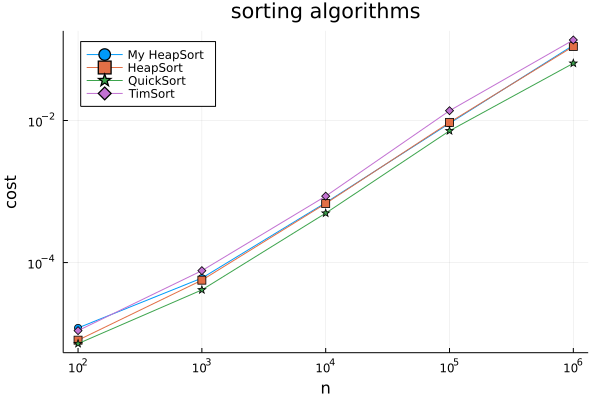

In [66]:
Nrand = [100, 1000, 10_000, 100_000, 1000_000]
Trand = permutedims(hcat([sort_benchmarking(rand(Int, n), A[2:end]) for n in Nrand]...))
plot(Nrand, Trand, label=permutedims(L[2:end]), m=:auto, scale=:log10, title="sorting algorithms", ylabel="cost", xlabel="n", legend=:topleft)

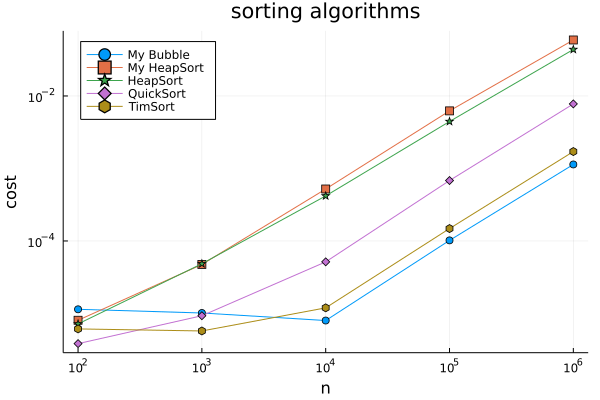

In [68]:
Trand = permutedims(hcat([sort_benchmarking(collect(1:n), A) for n in Nrand]...))
plot(Nrand, Trand, label=permutedims(L), m=:auto, scale=:log10, title="sorting algorithms", ylabel="cost", xlabel="n", legend=:topleft)

In [70]:
function perturb(n, p)
    X = collect(1:n)
    m = floor(Int, n * p)
    for i in 1:m
        j = rand(1:n-1)
        X[i], X[i+1] = X[i+1], X[i]
    end
    
    X
end

perturb (generic function with 1 method)

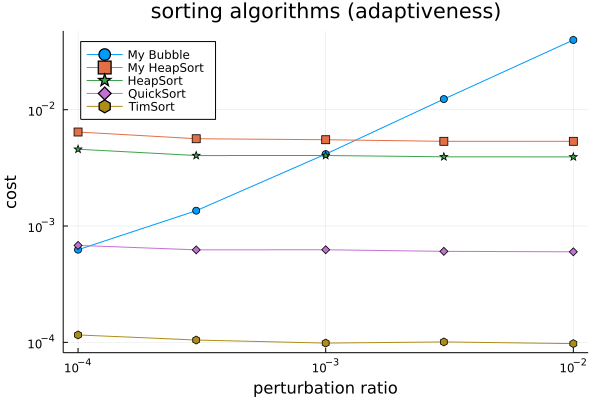

In [80]:
P = [0.0001, 0.0003, 0.001, 0.003, 0.01]
Trand = permutedims(hcat([sort_benchmarking(perturb(100_000, p), A) for p in P]...))
plot(P, Trand, label=permutedims(L), m=:auto, scale=:log10, title="sorting algorithms (adaptiveness)", ylabel="cost", xlabel="perturbation ratio", legend=:topleft)